In [2]:
from json import load
from scipy.ndimage import median_filter
from matplotlib.pylab import f
from truesight.masks import create_continuous_similarity_mask
from truesight.util import load_video, load_background, load_mask, load_triplets, show_image
from truesight.features import mode_feature
import numpy as np
# import logarithm


triplets = load_triplets("data/public/backgrounds", "data/public/videos","data/public/masks")
sample = triplets[30]
print(sample)
video = np.array(load_video(sample[0]))
background = load_background(sample[2])
mask = load_mask(sample[1])
mask_f = mask.astype(float) / 255.0
frame_idx = 350
frame = video[frame_idx]

video_mode = mode_feature(video).numpy()

(PosixPath('data/public/videos/2_i_setup_bridge_mp.mp4'), PosixPath('data/public/masks/2_i_setup_mp.png'), PosixPath('data/public/backgrounds/setup.png'))


In [3]:
def create_similarity_decision_mask(frame, ground_truth_bg, mode_bg, threshold=0.1):
    """
    Create binary mask based on similarity comparison
    Returns 1 for pixels more similar to ground truth (real background flicker)
    Returns 0 for pixels more similar to mode (virtual background)
    """
    # Calculate similarity to ground truth background
    sim_to_gt = create_continuous_similarity_mask(frame, ground_truth_bg)
    
    # Calculate similarity to mode background  
    sim_to_mode = create_continuous_similarity_mask(frame, mode_bg)
    
    # Decision mask: 1 where ground truth similarity is higher
    decision_mask = (sim_to_gt - sim_to_mode) > threshold
    
    return decision_mask.astype(np.uint8)

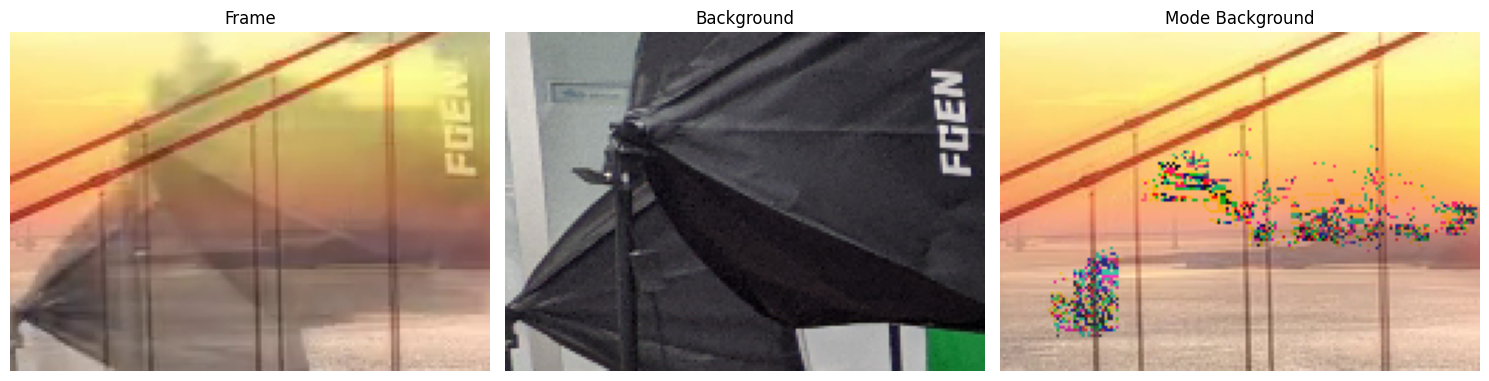

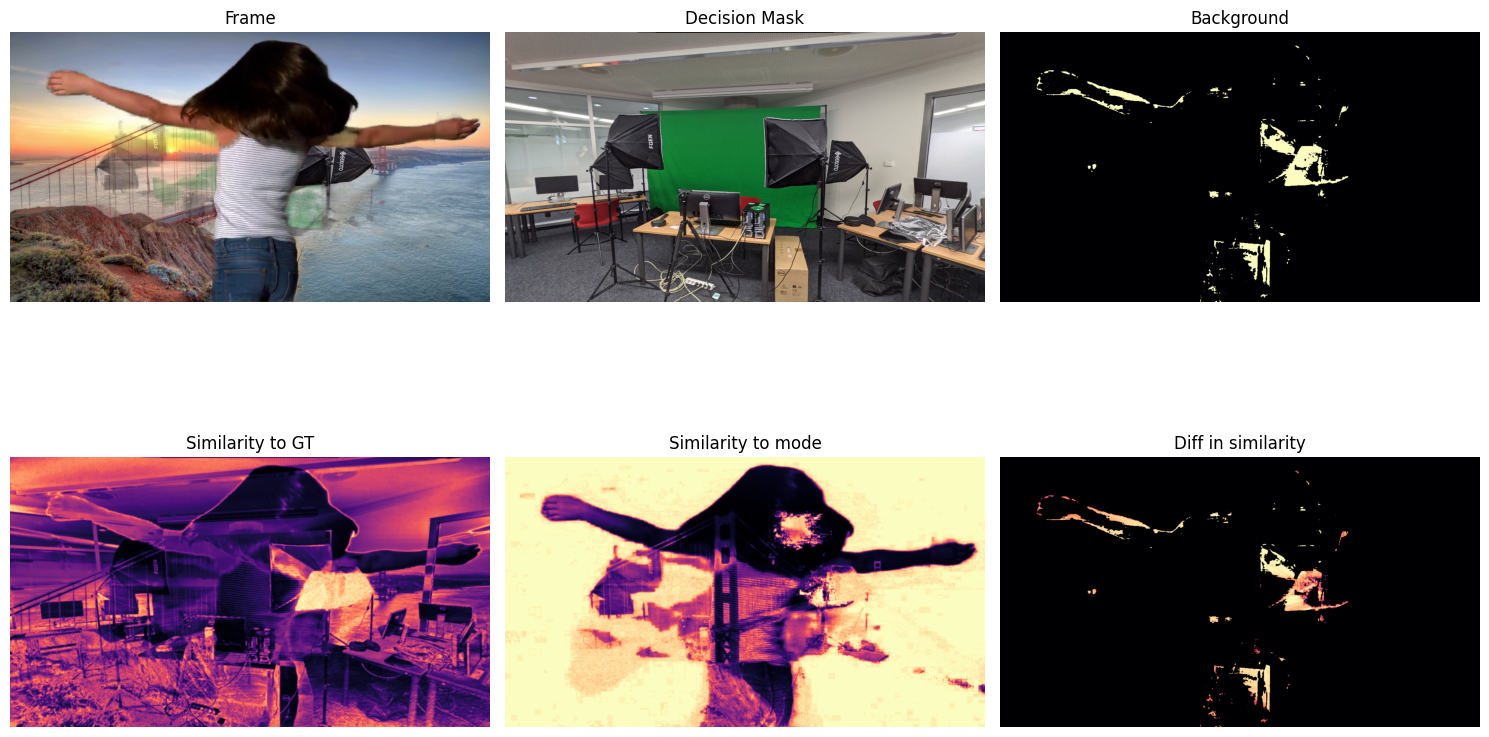

'\nshow_image(sim_mask_mode, "Mode Similarity Mask", cmap="magma")\nprint(sim_mask_mode[710:720,0:10])\n\nplt.figure(figsize=(10, 6))\nplt.imshow(frame)\nplt.imshow(similarity_mask_decision, alpha=0.5, cmap=\'magma\')\nplt.title("Overlayed Mask on Frame")\nplt.axis(\'off\')\nplt.show()\n\nshow_image(similarity_mask_decision, "Decided Mask", cmap="gray")\n\nshow_image(similarity_mask, "Similarity Mask", cmap="gray")\nshow_image(frame, "Frame")\nshow_image(background, "Background")\n\n'

In [27]:
# import median filter
from truesight.util import show_images
frame_idx = 22
frame = video[frame_idx]

import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
similarity_mask = create_continuous_similarity_mask(frame, background, "perceptual_distance")
similarity_mask_decision = create_similarity_decision_mask(frame, background, video_mode, 
                threshold=0.2)
# similarity_mask_decision = median_filter(similarity_mask_decision, size=10)




sim_mask_mode = create_continuous_similarity_mask(frame, video_mode, "perceptual_distance")

difference_mask = similarity_mask_decision - sim_mask_mode
difference_mask = np.clip(difference_mask, 0, 1)


# show_image(frame[260:380, 230:400], "Frame")

show_images([frame[260:380, 230:400], background[260:380, 230:400],video_mode[260:380, 230:400],],
             titles=["Frame", "Background", "Mode Background"], 
             cmap="magma")

show_images([frame, background, similarity_mask_decision, similarity_mask, sim_mask_mode,  difference_mask],
             titles=["Frame", "Decision Mask", "Background", "Similarity to GT", "Similarity to mode", "Diff in similarity" ], 
             cmap="magma")


"""
show_image(sim_mask_mode, "Mode Similarity Mask", cmap="magma")
print(sim_mask_mode[710:720,0:10])

plt.figure(figsize=(10, 6))
plt.imshow(frame)
plt.imshow(similarity_mask_decision, alpha=0.5, cmap='magma')
plt.title("Overlayed Mask on Frame")
plt.axis('off')
plt.show()

show_image(similarity_mask_decision, "Decided Mask", cmap="gray")

show_image(similarity_mask, "Similarity Mask", cmap="gray")
show_image(frame, "Frame")
show_image(background, "Background")

"""



